In [6]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import os
import h5py
import ecg_plot
import matplotlib.pyplot as plt
from openpyxl.worksheet.datavalidation import DataValidation

In [10]:
# CARREGAR IDS
SB = pd.read_csv('../amostras/SB_amostras.csv')
ST = pd.read_csv('../amostras/ST_amostras.csv')
AF = pd.read_csv('../amostras/AF_amostras.csv')
normais = pd.read_csv('../amostras/normais_amostras.csv')
RBBB = pd.read_csv('../amostras/RBBB_amostras.csv')
LBBB = pd.read_csv('../amostras/LBBB_amostras.csv')

print('SB: ', SB.shape[0])
print('ST: ', ST.shape[0])
print('AF: ', AF.shape[0])
print('Normais: ', normais.shape[0])
print('RBBB: ', RBBB.shape[0])
print('LBBB: ', LBBB.shape[0])

dados_selecionados = pd.concat([ST, SB, AF, LBBB, RBBB, normais], ignore_index=False)

# Ordena os dados para garantir que a operação seja feita de forma consistente
dados_selecionados = dados_selecionados.sort_values(by=['exam_id'], ascending=True)
print('Tamanho inicial:', dados_selecionados.shape[0])

dados_selecionados.to_csv('teste.csv', index = 0)

# Identifica as duplicatas (mantendo apenas a primeira ocorrência)
duplicatas = dados_selecionados[dados_selecionados.duplicated(subset='exam_id', keep='first')]

# Imprime as colunas 'tipo' das duplicatas
print('Tipos das duplicatas removidas:')
print(duplicatas[['exam_id'  ,'normal_ecg'  ]])

# Remove as duplicatas
dados_selecionados = dados_selecionados.drop_duplicates(subset='exam_id')
print('Tamanho depois de remover duplicatas:', dados_selecionados.shape[0])

SB:  45
ST:  45
AF:  45
Normais:  80
RBBB:  45
LBBB:  45
Tamanho inicial: 305
Tipos das duplicatas removidas:
Empty DataFrame
Columns: [exam_id, normal_ecg]
Index: []
Tamanho depois de remover duplicatas: 305


In [11]:
# SALVAR IDS EM EXCEL 
ids = dados_selecionados['exam_id'].tolist()
ids = pd.DataFrame({
    'exam_id': ids,
    'doenca': [''] * len(ids),
    'borderline': [''] * len(ids),
    'comentario': [''] * len(ids) 
})

num_parts = 4
split_dfs = np.array_split(ids, num_parts)

for i, df_part in enumerate(split_dfs):
    excel_path = f'parte_{i+1}.xlsx'
    df_part.to_excel(excel_path, index=False)
    print(f"Arquivo Excel '{excel_path}' salvo com sucesso.")

Arquivo Excel 'parte_1.xlsx' salvo com sucesso.
Arquivo Excel 'parte_2.xlsx' salvo com sucesso.
Arquivo Excel 'parte_3.xlsx' salvo com sucesso.
Arquivo Excel 'parte_4.xlsx' salvo com sucesso.


c:\Users\luisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
for i in range(4):
    excel_path = f'parte_{i+1}.xlsx'

    # Adicionar validação de dados para a coluna 'doenca'
    wb = load_workbook(excel_path)
    ws = wb.active

    # Criar uma lista de opções para a validação de dados na coluna 'doenca'
    doenca_options = ['ST', 'SB', 'AF', 'LBBB', 'RBBB', '1dAVB', 'Outra', 'Nenhuma', 'Interferência']
    doenca_dv = DataValidation(type="list", formula1=f'"{",".join(doenca_options)}"', showDropDown=True)

    # Criar uma lista de opções para a validação de dados na coluna 'borderline'
    borderline_options = ['Sim', 'Não']
    borderline_dv = DataValidation(type="list", formula1=f'"{",".join(borderline_options)}"', showDropDown=True)

    # Adicionar a validação às colunas apropriadas
    for row in range(2, len(ids) + 2):   # Começa na linha 2 para pular o cabeçalho
        doenca_cell = ws[f'B{row}']      # Coluna B para 'doenca'
        borderline_cell = ws[f'C{row}']  # Coluna C para 'borderline'
        
        ws.add_data_validation(doenca_dv)
        ws.add_data_validation(borderline_dv)
        
        doenca_dv.add(doenca_cell)
        borderline_dv.add(borderline_cell)

    # Salvar o arquivo com a validação de dados
    wb.save(excel_path)
    print("Validação de dados adicionada e arquivo salvo com sucesso.")

Validação de dados adicionada e arquivo salvo com sucesso.
Validação de dados adicionada e arquivo salvo com sucesso.
Validação de dados adicionada e arquivo salvo com sucesso.
Validação de dados adicionada e arquivo salvo com sucesso.


In [13]:
for i, df_part in enumerate(split_dfs):
    print(df_part.shape[0])

77
76
76
76


Sucesso: exame ID 10592 salvo.
Sucesso: exame ID 13870 salvo.
Sucesso: exame ID 16196 salvo.
Sucesso: exame ID 33691 salvo.
Sucesso: exame ID 34833 salvo.
Sucesso: exame ID 37414 salvo.
Sucesso: exame ID 44874 salvo.
Sucesso: exame ID 46877 salvo.
Sucesso: exame ID 58190 salvo.
Sucesso: exame ID 62013 salvo.
Sucesso: exame ID 62281 salvo.
Sucesso: exame ID 65304 salvo.
Sucesso: exame ID 74211 salvo.
Sucesso: exame ID 76774 salvo.
Sucesso: exame ID 87958 salvo.
Sucesso: exame ID 91895 salvo.
Sucesso: exame ID 93077 salvo.
Sucesso: exame ID 94185 salvo.
Sucesso: exame ID 100699 salvo.
Sucesso: exame ID 102143 salvo.
Sucesso: exame ID 113426 salvo.
Sucesso: exame ID 121194 salvo.
Sucesso: exame ID 126837 salvo.
Sucesso: exame ID 143713 salvo.
Sucesso: exame ID 149662 salvo.
Sucesso: exame ID 155194 salvo.
Sucesso: exame ID 159985 salvo.
Sucesso: exame ID 160107 salvo.
Sucesso: exame ID 171266 salvo.
Sucesso: exame ID 172422 salvo.
Sucesso: exame ID 187072 salvo.
Sucesso: exame ID 192258 s

KeyboardInterrupt: 

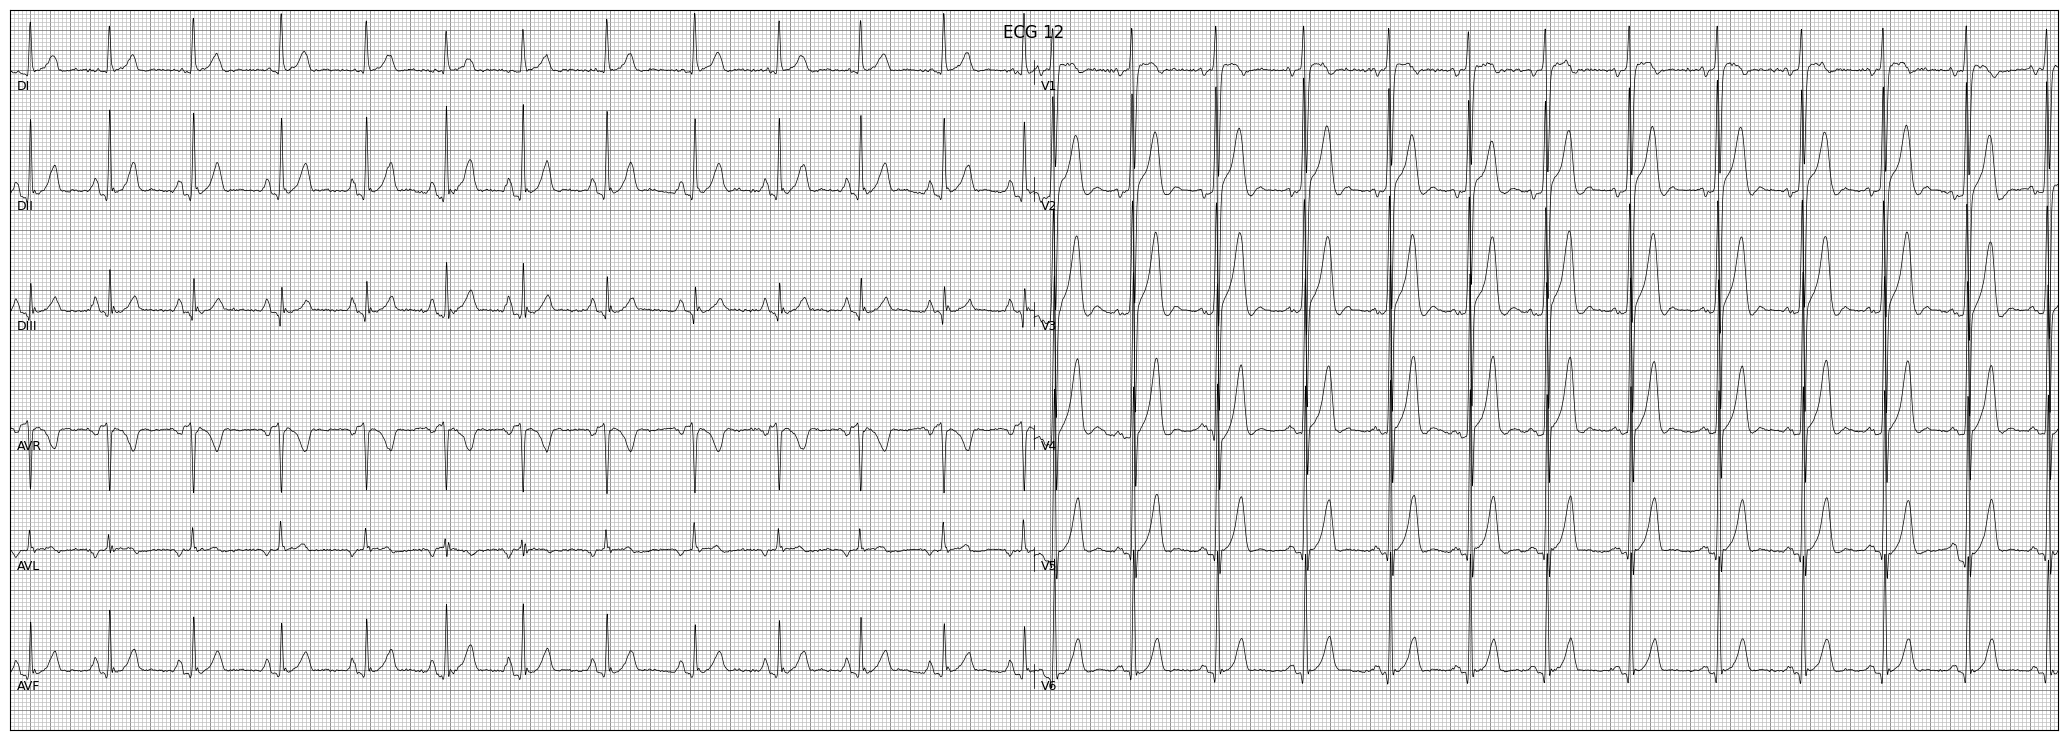

In [26]:
def create_folders(base_path, num_folders):
    for i in range(num_folders):
        folder_path = os.path.join(base_path, f'parte_{i+1}')
        os.makedirs(folder_path, exist_ok=True)

def plot_and_save_ecgs(split_dfs, arquivos_hdf5, base_path):
    create_folders(base_path, len(split_dfs))

    # ESCOLHA AQUI QUAL ARTE PROCESSAR (0-3)
    i = 0
    df_part = split_dfs[i]
    folder_path = os.path.join(base_path, f'parte_{i+1}')
    exam_ids_to_plot = df_part['exam_id'].tolist()
    
    for exam_id in exam_ids_to_plot:
        found = False  
        for arquivo in arquivos_hdf5:
            try:
                with h5py.File(arquivo, 'r') as f:
                    exam_ids = np.array(f['exam_id'])
                    exam_index = np.where(exam_ids == exam_id)[0]

                    if len(exam_index) == 0:
                        continue
                    else:
                        exam_index = exam_index[0]
                        exam_tracings = f['tracings'][exam_index]
                        ecg = np.array(exam_tracings).T
                        ecg_plot.plot(ecg, sample_rate=400,
                            lead_index=['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], style='bw')
                        # rm ticks
                        plt.tick_params(
                            axis='both',  # changes apply to the x-axis
                            which='both',  # both major and minor ticks are affected
                            bottom=False,  # ticks along the bottom edge are off
                            top=False,  # ticks along the top edge are off
                            left=False,
                            right=False,
                            labelleft=False,
                            labelbottom=False)  # labels along the bottom edge are off
                        plt.savefig(os.path.join(folder_path, f'{exam_id}.png'), dpi=550)
                        plt.close()
                        found = True
                        break
            except Exception as e:
                print(f"Erro ao processar o arquivo {arquivo} para o exam ID {exam_id}: {e}")

        if not found:
            print(f"Erro: exame ID {exam_id} não encontrado em nenhum dos arquivos.")
        if found:
            print(f"Sucesso: exame ID {exam_id} salvo.")

base_path = 'imagens'

arquivos_hdf5 = [
    "../../Database/filtered_exams_0_1.hdf5", "../../Database/filtered_exams_2_3.hdf5",
    "../../Database/filtered_exams_4_5.hdf5", "../../Database/filtered_exams_6_7.hdf5",
    "../../Database/filtered_exams_8_9.hdf5", "../../Database/filtered_exams_10_11.hdf5",
    "../../Database/filtered_exams_12_13.hdf5", "../../Database/filtered_exams_14_15.hdf5",
    "../../Database/filtered_exams_16_17.hdf5"
]

plot_and_save_ecgs(split_dfs, arquivos_hdf5, base_path)

print("Processo completo!")